# ResNet Architecture
(Paper: https://arxiv.org/pdf/1512.03385.pdf)

#### Paper Summary
- 8 x Deeper than VGGnets with lower complexity. This is as a result of using shortcut connections.
- BatchNormalization is adopted right after each Convolution layer And before Activation
- No Dropout is used. 


<center><img src='./Images/ResNet2.png' alt="Alternative text" align="center" /></center>

<center><img src='./Images/ResNet.png' alt="Alternative text" align="center" /></center>

## Import Library 

In [313]:
import tensorflow as tf 
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, ReLU, AveragePooling2D, Softmax, BatchNormalization, Input, GlobalAveragePooling2D
from tensorflow.keras import Model

## Building Blocks

#### Each CNN Block 

In [314]:
def cnn_block(input, filters, kernels, strides=1):
    x = Conv2D(filters=filters, kernel_size=kernels, padding='same', strides=strides)(input)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

#### Stem Blocks

3 x 3

In [315]:
def conv3(x, filters, bigger_network=False, strides = 1):
    block = 2
    if bigger_network:
        block = 1
    
    for a, b in enumerate(range(block)):
        x = cnn_block(x, filters, 3, strides=strides)
    return x 


1 x 1 

In [316]:
def conv1(x, filters):
    x = cnn_block(x, filters, 1)
    return x 

Stage Blocks

In [317]:
def stage_blocks(x, filters, bigger_network=False, strides=1):
    if bigger_network:
        x = conv1(x, filters)
    x = conv3(x, filters, bigger_network, strides=strides)
    if bigger_network:
        x = conv1(x, filters * 4)
    return x 

Big Network Logic

In [318]:
def big_network(architecture_type):
    return architecture_type>34

Depth Logic

In [319]:
def depthlogic(architecture_type):
    stage_2 = 2 
    stage_3 = 2 
    stage_4 = 2 
    stage_5 = 2 
    if architecture_type>18:
        stage_2 = 3
        stage_3 = 4
        stage_4 = 6 
        stage_5 = 3
        if architecture_type==101:
            stage_4 = 23
        if architecture_type> 101:
            stage_3 = 8
            stage_4 = 36
        
    return stage_2, stage_3, stage_4, stage_5


Stage Iterator

In [320]:
def stage_iterator(x, stage, bigger_network, filters):
    for a, b in enumerate(range(stage)):
        if a == 0:
            strides = 2
            x = stage_blocks(x, filters, bigger_network=bigger_network, strides=strides)
        else:
            strides = 1
            x = tf.keras.layers.Concatenate()([x, stage_blocks(x, filters, bigger_network=bigger_network, strides=strides)])
    return x

## Final Architecture

In [321]:

def final_architecture(architecture_type, no_outputs):
    if architecture_type not in [18, 34, 50, 101, 152]:
        raise ValueError('enter one of 18, 34, 50, 101, 152 as ResNet type')
    stage_2, stage_3, stage_4, stage_5 = depthlogic(architecture_type)
    bigger_network = big_network(architecture_type)
    input = Input(shape=(224,224, 3))
    x = Conv2D(64, kernel_size=7, strides=2, padding='same')(input)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPool2D(pool_size=3, strides=2)(x)
    for i in range(stage_2):
        x =  tf.keras.layers.Concatenate()([x, stage_blocks(x, 64,  bigger_network= bigger_network)])
    x = stage_iterator(x,stage_3, bigger_network, 128 )
    x = stage_iterator(x,stage_4, bigger_network, 256 )
    x = stage_iterator(x,stage_5, bigger_network, 512 )
    x = GlobalAveragePooling2D()(x)
    x= Dense(no_outputs)(x)
    x = Softmax()(x)
    
    model = Model(input, x)
    return model

In [322]:
model = final_architecture(18, 1000)

In [323]:
model.summary()

Model: "model_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_29 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1238 (Conv2D)            (None, 112, 112, 64) 9472        input_29[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1236 (Batch (None, 112, 112, 64) 256         conv2d_1238[0][0]                
__________________________________________________________________________________________________
re_lu_1236 (ReLU)               (None, 112, 112, 64) 0           batch_normalization_1236[0][0]   
___________________________________________________________________________________________

In [324]:
a =1 
b = a 
b = 2
a

1

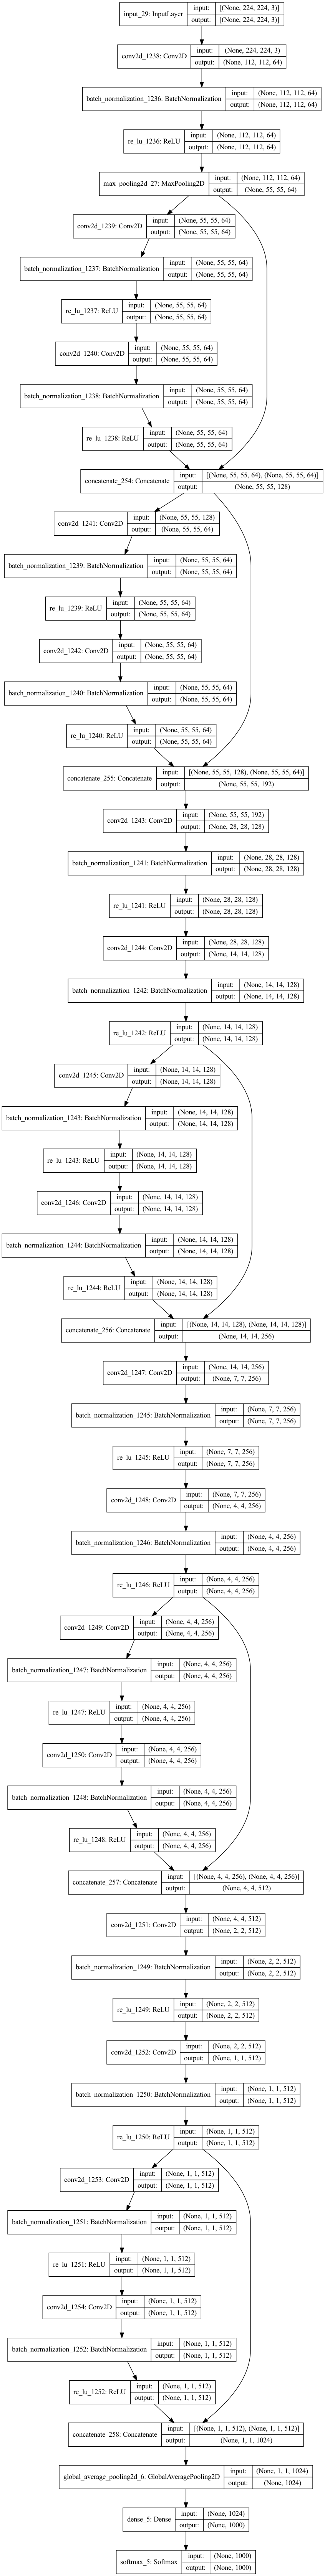

In [326]:
tf.keras.utils.plot_model(model, show_shapes=True)